In [1]:
import os
import pandas as pd

dfs = {}

# Load all CSV files in cobias-scores/
for filename in os.listdir('cobias-scores'):
    if filename.endswith('.csv'):
        model = filename.split('_')[-1].split('.')[0]
        dfs[model] = pd.read_csv(f'cobias-scores/{filename}')

In [2]:
dfs['bert-base-uncased'].head()

,Unnamed: 0,id,augmented_scores_list,original_score,original_PLL,augmented_PLLs,context_variance,cobias
0,0,0,"[2.0052650802613274, 2.1564433803214174, 1.927...",1.749678,[1.7496775491199688],"[[2.0052650802613274], [2.1564433803214174], [...",3.210803,0.589769
1,1,1,"[1.9719452959381871, 2.5459434481130705, 2.084...",1.954840,[1.9548399165272712],"[[1.9719452959381871], [2.5459434481130705], [...",2.473770,0.554613
2,2,2,"[1.376836509450749, 1.4288826874486404, 1.4481...",1.328254,[1.3282540687625228],"[[1.376836509450749], [1.4288826874486404], [1...",2.335853,0.546429
3,3,3,"[1.66502170291369, 2.4382013475375666, 2.07806...",1.890558,[1.8905575218136998],"[[1.66502170291369], [2.4382013475375666], [2....",6.865619,0.673470
4,4,4,"[1.099552131291451, 2.2751972610086124, 1.5177...",1.595665,[1.5956650910608006],"[[1.099552131291451], [2.2751972610086124], [1...",26.989855,0.769151


In [3]:
# Create a set which is an intersection of all id from each df
ids = set(dfs['bert-base-uncased']['id'])
for model, df in dfs.items():
    ids = ids.intersection(df['id'])

In [4]:
len(ids)

2227

In [5]:
# Filter each df to only include rows with id in the intersection set
for model, df in dfs.items():
    dfs[model] = df[df['id'].isin(ids)]

In [6]:
# Merge 'cobias' column of each dataframe into a single dataframe with header as model name
cobias_df = pd.DataFrame()
for model, df in dfs.items():
    cobias_df[model] = df['cobias']

# Add 'id' column to the cobias_df
cobias_df['id'] = dfs['bert-base-uncased']['id']
cobias_df


,bert-base-uncased,legal-bert-base-uncased,roberta-large,albert-xlarge-v2,bert-large-uncased,ClinicalBERT,albert-xxlarge-v2,roberta-base,distilbert-base-uncased,albert-large-v2,albert-base-v2,id
0,0.589769,0.631615,0.657371,0.644437,0.635428,0.672488,0.689306,0.725528,0.577058,0.715196,0.663522,0
1,0.554613,0.597496,0.672547,0.696645,0.621529,0.751711,0.608546,0.677966,0.555479,0.702448,0.625354,1
2,0.546429,0.649508,0.710020,0.631230,0.604149,0.668015,0.530582,0.732686,0.571306,0.642768,0.520578,2
3,0.673470,0.587955,0.660754,0.677672,0.734037,0.646936,0.720051,0.612258,0.640819,0.598249,0.642172,3
4,0.769151,0.785297,0.792997,0.768730,0.786122,0.827603,0.760737,0.787678,0.773978,0.747092,0.790100,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2224,0.774496,0.708003,0.000000,0.759301,0.770978,0.805550,0.719612,0.000000,0.749082,0.726731,0.781830,2286
2225,0.726767,0.789680,0.824551,0.690797,0.787456,0.803264,0.729631,0.829813,0.729424,0.712036,0.618598,2287
2226,0.738269,0.820694,0.787860,0.704825,0.681277,0.791645,0.704447,0.795718,0.724325,0.701929,0.701239,2288
2227,0.754643,0.785658,0.718950,0.797618,0.754603,0.749621,0.818663,0.724185,0.655629,0.797065,0.817592,2289


In [7]:
# Remove values with NaN
cobias_df = cobias_df.dropna()

In [8]:
# For each .txt file in pollm-ratings/ directory, load the file and add it to the cobias_df
for filename in os.listdir('pollm-ratings'):
    if filename.endswith('.txt'):
        model = filename.split('_')[-1].split('.txt')[0]
        with open(f'pollm-ratings/{filename}', 'r') as f:
            ratings = f.readlines()
            ratings = dict(enumerate(ratings))
            ratings = {k: v[0] for k, v in ratings.items()}

            cobias_df[f'{model}_rating'] = cobias_df['id'].map(ratings)
            

/var/folders/xv/1s02_9950fd_bggcfbrcrw940000gn/T/ipykernel_3897/1554898263.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cobias_df[f'{model}_rating'] = cobias_df['id'].map(ratings)
/var/folders/xv/1s02_9950fd_bggcfbrcrw940000gn/T/ipykernel_3897/1554898263.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cobias_df[f'{model}_rating'] = cobias_df['id'].map(ratings)
/var/folders/xv/1s02_9950fd_bggcfbrcrw940000gn/T/ipykernel_3897/1554898263.py:10: SettingWithCopyWarning: 
A value is trying to be set o

In [9]:
cobias_df

,bert-base-uncased,legal-bert-base-uncased,roberta-large,albert-xlarge-v2,bert-large-uncased,ClinicalBERT,albert-xxlarge-v2,roberta-base,distilbert-base-uncased,albert-large-v2,albert-base-v2,id,gemma-7b-it_rating,DeciLM-7B-instruct_rating,Mistral-7B-Instruct-v0.2_rating,Mistral-7B-Instruct-v0.3_rating,Phi-3-mini-128k-instruct_rating,Meta-Llama-3-8B-Instruct_rating,OLMo-7B-Instruct_rating
0,0.589769,0.631615,0.657371,0.644437,0.635428,0.672488,0.689306,0.725528,0.577058,0.715196,0.663522,0,2,3,3,3,1,4,3
1,0.554613,0.597496,0.672547,0.696645,0.621529,0.751711,0.608546,0.677966,0.555479,0.702448,0.625354,1,3,3,3,3,4,4,4
2,0.546429,0.649508,0.710020,0.631230,0.604149,0.668015,0.530582,0.732686,0.571306,0.642768,0.520578,2,2,3,3,1,4,4,4
3,0.673470,0.587955,0.660754,0.677672,0.734037,0.646936,0.720051,0.612258,0.640819,0.598249,0.642172,3,2,3,3,3,5,4,4
4,0.769151,0.785297,0.792997,0.768730,0.786122,0.827603,0.760737,0.787678,0.773978,0.747092,0.790100,4,2,3,1,1,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2223,0.816368,0.801069,0.814066,0.750573,0.822551,0.673454,0.754199,0.821348,0.807798,0.719112,0.774693,2285,2,5,5,5,5,4,3
2224,0.774496,0.708003,0.000000,0.759301,0.770978,0.805550,0.719612,0.000000,0.749082,0.726731,0.781830,2286,3,5,5,3,5,4,3
2225,0.726767,0.789680,0.824551,0.690797,0.787456,0.803264,0.729631,0.829813,0.729424,0.712036,0.618598,2287,2,1,1,1,2,3,2
2226,0.738269,0.820694,0.787860,0.704825,0.681277,0.791645,0.704447,0.795718,0.724325,0.701929,0.701239,2288,3,3,3,4,4,4,4


In [10]:
# Drop rows where values are 0 or missing
cobias_df = cobias_df[(cobias_df != 0).all(1)]
cobias_df = cobias_df.dropna()

# Drop Meta-Llama-3-8B-Instruct_rating column
cobias_df = cobias_df.drop(columns=['Meta-Llama-3-8B-Instruct_rating'])

# Covert all columns to pd.to_numeric
for col in cobias_df.columns:
    cobias_df[col] = pd.to_numeric(cobias_df[col], errors='coerce')

cobias_df

,bert-base-uncased,legal-bert-base-uncased,roberta-large,albert-xlarge-v2,bert-large-uncased,ClinicalBERT,albert-xxlarge-v2,roberta-base,distilbert-base-uncased,albert-large-v2,albert-base-v2,id,gemma-7b-it_rating,DeciLM-7B-instruct_rating,Mistral-7B-Instruct-v0.2_rating,Mistral-7B-Instruct-v0.3_rating,Phi-3-mini-128k-instruct_rating,OLMo-7B-Instruct_rating
1,0.554613,0.597496,0.672547,0.696645,0.621529,0.751711,0.608546,0.677966,0.555479,0.702448,0.625354,1,3.0,3,3.0,3.0,4.0,4.0
2,0.546429,0.649508,0.710020,0.631230,0.604149,0.668015,0.530582,0.732686,0.571306,0.642768,0.520578,2,2.0,3,3.0,1.0,4.0,4.0
3,0.673470,0.587955,0.660754,0.677672,0.734037,0.646936,0.720051,0.612258,0.640819,0.598249,0.642172,3,2.0,3,3.0,3.0,5.0,4.0
4,0.769151,0.785297,0.792997,0.768730,0.786122,0.827603,0.760737,0.787678,0.773978,0.747092,0.790100,4,2.0,3,1.0,1.0,1.0,2.0
5,0.703186,0.788840,0.666563,0.807381,0.701942,0.807906,0.759410,0.772163,0.768273,0.776676,0.807510,5,2.0,3,1.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,0.791214,0.801334,0.773033,0.802268,0.825386,0.840332,0.816208,0.783731,0.776149,0.806697,0.803719,2284,3.0,5,5.0,4.0,4.0,4.0
2223,0.816368,0.801069,0.814066,0.750573,0.822551,0.673454,0.754199,0.821348,0.807798,0.719112,0.774693,2285,2.0,5,5.0,5.0,5.0,3.0
2225,0.726767,0.789680,0.824551,0.690797,0.787456,0.803264,0.729631,0.829813,0.729424,0.712036,0.618598,2287,2.0,1,1.0,1.0,2.0,2.0
2226,0.738269,0.820694,0.787860,0.704825,0.681277,0.791645,0.704447,0.795718,0.724325,0.701929,0.701239,2288,3.0,3,3.0,4.0,4.0,4.0


In [11]:
# Rearrange columns in order albert-base-v2, albert-large-v2, albert-xlarge-v2, albert-xxlarge-v2,
# bert-base-uncased, bert-large-uncased, distilbert-base-uncased, roberta-base, roberta-large,
# legal-bert-base-uncased, ClinicalBERT

cobias_df = cobias_df.reindex(columns=[
    'id',
    'albert-base-v2', 'albert-large-v2', 'albert-xlarge-v2', 'albert-xxlarge-v2',
    'bert-base-uncased', 'bert-large-uncased', 'distilbert-base-uncased', 'roberta-base', 'roberta-large',
    'legal-bert-base-uncased', 'ClinicalBERT',
    'gemma-7b-it_rating', 'DeciLM-7B-instruct_rating', 'Mistral-7B-Instruct-v0.2_rating', 'Mistral-7B-Instruct-v0.2_rating',
    'Mistral-7B-Instruct-v0.2_rating', 'OLMo-7B-Instruct_rating'
])

In [12]:
cobias_df

,id,albert-base-v2,albert-large-v2,albert-xlarge-v2,albert-xxlarge-v2,bert-base-uncased,bert-large-uncased,distilbert-base-uncased,roberta-base,roberta-large,legal-bert-base-uncased,ClinicalBERT,gemma-7b-it_rating,DeciLM-7B-instruct_rating,Mistral-7B-Instruct-v0.2_rating,Mistral-7B-Instruct-v0.2_rating,Mistral-7B-Instruct-v0.2_rating,OLMo-7B-Instruct_rating
1,1,0.625354,0.702448,0.696645,0.608546,0.554613,0.621529,0.555479,0.677966,0.672547,0.597496,0.751711,3.0,3,3.0,3.0,3.0,4.0
2,2,0.520578,0.642768,0.631230,0.530582,0.546429,0.604149,0.571306,0.732686,0.710020,0.649508,0.668015,2.0,3,3.0,3.0,3.0,4.0
3,3,0.642172,0.598249,0.677672,0.720051,0.673470,0.734037,0.640819,0.612258,0.660754,0.587955,0.646936,2.0,3,3.0,3.0,3.0,4.0
4,4,0.790100,0.747092,0.768730,0.760737,0.769151,0.786122,0.773978,0.787678,0.792997,0.785297,0.827603,2.0,3,1.0,1.0,1.0,2.0
5,5,0.807510,0.776676,0.807381,0.759410,0.703186,0.701942,0.768273,0.772163,0.666563,0.788840,0.807906,2.0,3,1.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,2284,0.803719,0.806697,0.802268,0.816208,0.791214,0.825386,0.776149,0.783731,0.773033,0.801334,0.840332,3.0,5,5.0,5.0,5.0,4.0
2223,2285,0.774693,0.719112,0.750573,0.754199,0.816368,0.822551,0.807798,0.821348,0.814066,0.801069,0.673454,2.0,5,5.0,5.0,5.0,3.0
2225,2287,0.618598,0.712036,0.690797,0.729631,0.726767,0.787456,0.729424,0.829813,0.824551,0.789680,0.803264,2.0,1,1.0,1.0,1.0,2.0
2226,2288,0.701239,0.701929,0.704825,0.704447,0.738269,0.681277,0.724325,0.795718,0.787860,0.820694,0.791645,3.0,3,3.0,3.0,3.0,4.0


In [13]:
cobias_df.to_csv('FINAL_COBIAS.csv', index=False)

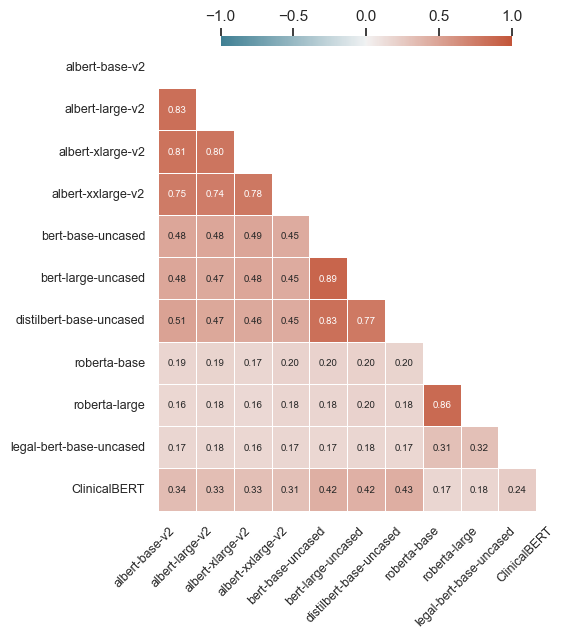

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
# Assuming 'cobias_df' is your DataFrame
corr = cobias_df.drop(columns=['id']).iloc[:, :11].corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plotting
plt.figure(figsize=(6, 7))  # Smaller width to fit in a single column
sns.set(style='white')  # Sets seaborn style to have a white background

# Generate a custom diverging colormap (Blue and Red)
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Heatmap with mask and correct aspect ratio
heatmap = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
            annot=True, fmt=".2f", square=False, linewidths=.5, 
            cbar_kws={"shrink": 0.7, "location": "top", "orientation": "horizontal", "aspect": 30, "pad": 0.0},
            annot_kws={"size": 7})  # Smaller font size for annotations

# Enhancements for aesthetics
# plt.title('Spearman Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=9, rotation=45, ha='right')
plt.yticks(fontsize=9)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap

# Save to file with high resolution
plt.savefig('heatmap_fit_column.png', dpi=300)  # Save as high-resolution image suitable for publication
plt.show()


In [208]:
mask.shape

(2137, 11)

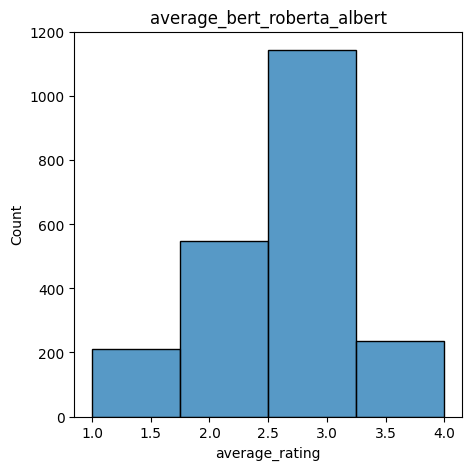

In [194]:
# # Plot the distribution of the last 6 columns on one plot considering values as integers and ignore NaN
# plt.figure(figsize=(10, 5))
# for col in cobias_df.columns[-6:]:
#     sns.histplot(cobias_df[col].dropna().astype(int), kde=True, label=col)
# plt.legend()
# plt.show()

# Plot individual distribution of each column
plt.figure(figsize=(5, 5))
# for col in cobias_df.columns[-6:]:
sns.histplot(cobias_df['average_rating'].dropna().astype(int), bins=4)
plt.title(col)
plt.show()

In [184]:
# Create new column  where value is average of last 7 columns
cobias_df['average_rating'] = cobias_df[cobias_df.columns[-6:]].mean(axis=1)

In [185]:
# Create column which is average of bert-large-uncased, roberta-large, albert-xxlarge-v2
cobias_df['average_bert_roberta_albert'] = cobias_df[['bert-large-uncased', 'roberta-large', 'albert-xxlarge-v2']].mean(axis=1)
cobias_df

,bert-base-uncased,legal-bert-base-uncased,roberta-large,albert-xlarge-v2,bert-large-uncased,ClinicalBERT,albert-xxlarge-v2,roberta-base,distilbert-base-uncased,albert-large-v2,albert-base-v2,id,gemma-7b-it_rating,DeciLM-7B-instruct_rating,Mistral-7B-Instruct-v0.2_rating,Mistral-7B-Instruct-v0.3_rating,Phi-3-mini-128k-instruct_rating,OLMo-7B-Instruct_rating,average_rating,average_bert_roberta_albert
1,0.554613,0.597496,0.672547,0.696645,0.621529,0.751711,0.608546,0.677966,0.555479,0.702448,0.625354,1,3.0,3,3.0,3.0,4.0,4.0,3.388889,0.634207
2,0.546429,0.649508,0.710020,0.631230,0.604149,0.668015,0.530582,0.732686,0.571306,0.642768,0.520578,2,2.0,3,3.0,1.0,4.0,4.0,2.972222,0.614917
3,0.673470,0.587955,0.660754,0.677672,0.734037,0.646936,0.720051,0.612258,0.640819,0.598249,0.642172,3,2.0,3,3.0,3.0,5.0,4.0,3.555556,0.704947
4,0.769151,0.785297,0.792997,0.768730,0.786122,0.827603,0.760737,0.787678,0.773978,0.747092,0.790100,4,2.0,3,1.0,1.0,1.0,2.0,1.611111,0.779952
5,0.703186,0.788840,0.666563,0.807381,0.701942,0.807906,0.759410,0.772163,0.768273,0.776676,0.807510,5,2.0,3,1.0,1.0,2.0,3.0,2.000000,0.709305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,0.791214,0.801334,0.773033,0.802268,0.825386,0.840332,0.816208,0.783731,0.776149,0.806697,0.803719,2284,3.0,5,5.0,4.0,4.0,4.0,4.361111,0.804876
2223,0.816368,0.801069,0.814066,0.750573,0.822551,0.673454,0.754199,0.821348,0.807798,0.719112,0.774693,2285,2.0,5,5.0,5.0,5.0,3.0,4.527778,0.796939
2225,0.726767,0.789680,0.824551,0.690797,0.787456,0.803264,0.729631,0.829813,0.729424,0.712036,0.618598,2287,2.0,1,1.0,1.0,2.0,2.0,1.416667,0.780546
2226,0.738269,0.820694,0.787860,0.704825,0.681277,0.791645,0.704447,0.795718,0.724325,0.701929,0.701239,2288,3.0,3,3.0,4.0,4.0,4.0,3.583333,0.724528


In [186]:
# Correlation between average_rating and average_bert_roberta_albert
cobias_df[['average_rating', 'average_bert_roberta_albert']].corr(method='spearman')

,average_rating,average_bert_roberta_albert
average_rating,1.000000,-0.052997
average_bert_roberta_albert,-0.052997,1.000000
